In [60]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MSI\Downloads\titanic-passengers.csv',sep=';')

df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [63]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [64]:
print(df['Cabin'].value_counts())

C23 C25 C27    4
G6             4
B96 B98        4
D              3
E101           3
              ..
C99            1
D11            1
E38            1
A32            1
C91            1
Name: Cabin, Length: 147, dtype: int64


In [65]:
df['Cabin'].fillna('G6', inplace=True)

In [66]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [67]:
df['Embarked'].fillna('S', inplace=True)


In [68]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

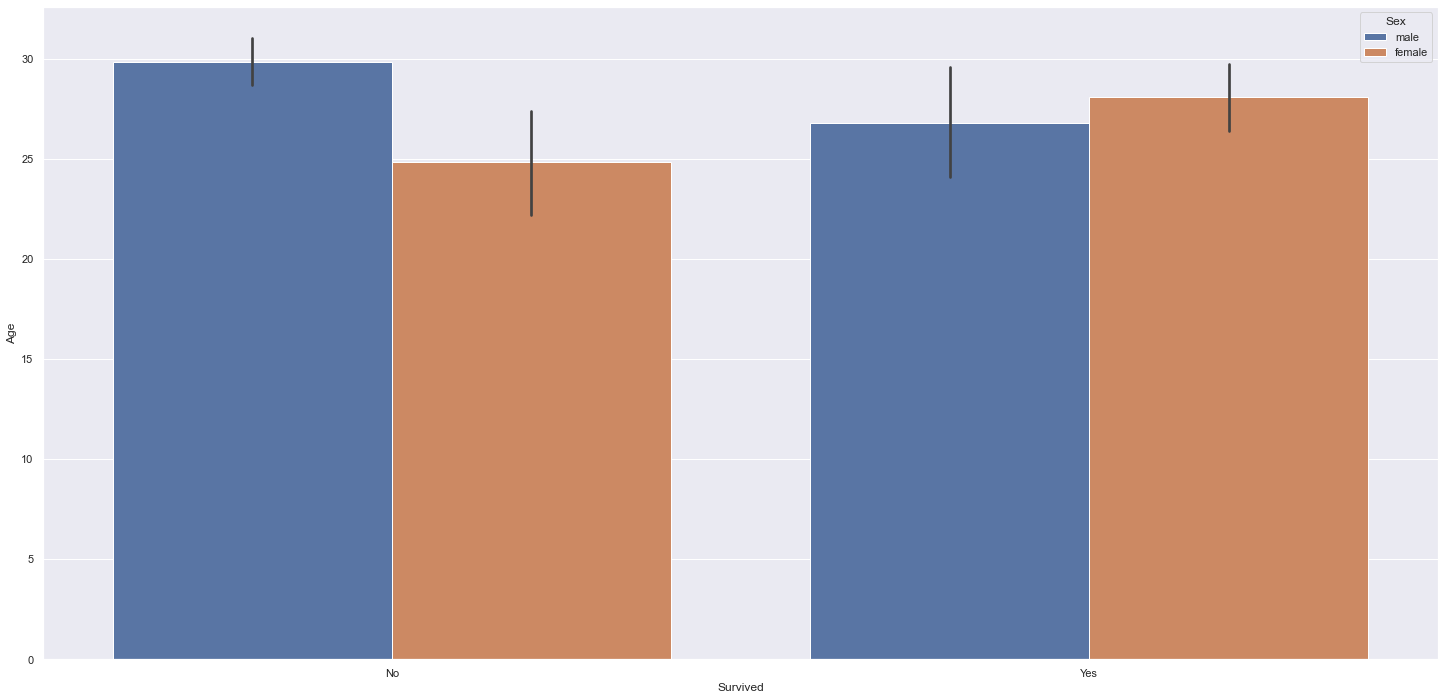

In [69]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,12)})
sns.barplot(x='Survived', y="Age", hue ='Sex',data=df);

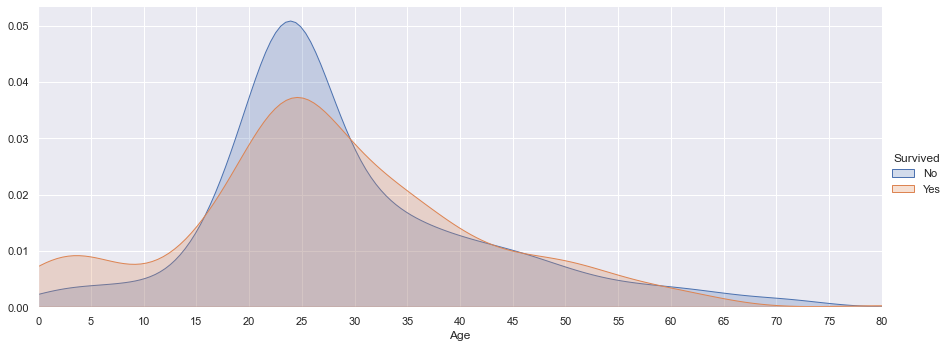

In [70]:
import numpy as np
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df, hue='Survived', height=5, aspect=2.5)
    g.map(sns.kdeplot, 'Age', shade=True)
    g.add_legend()
    g.set(xticks=np.arange(0, df['Age'].max() + 1, 5), xlim=(0, df['Age'].max()))

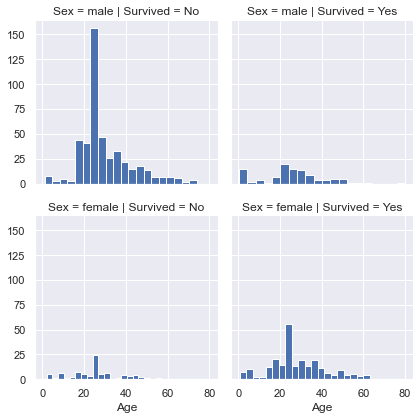

In [71]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(df, row='Sex',col='Survived',)
g.map(plt.hist,'Age',bins=20)

In [72]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [73]:
gender_number ={'Sex':{'male':0,'female':1}}
df.replace(gender_number, inplace=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,24.0,0,0,349215,7.8958,G6,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",1,19.0,0,0,250655,26.0000,G6,S


In [74]:
embark_number ={'Embarked':{'S':0,'C':1,'Q':2}}
df.replace(embark_number, inplace=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,1
887,61,No,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,1
888,535,No,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,24.0,0,0,349215,7.8958,G6,0
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",1,19.0,0,0,250655,26.0000,G6,0


In [75]:
survival_number ={'Survived':{'No':0,'Yes':1}}
df.replace(survival_number, inplace=True)

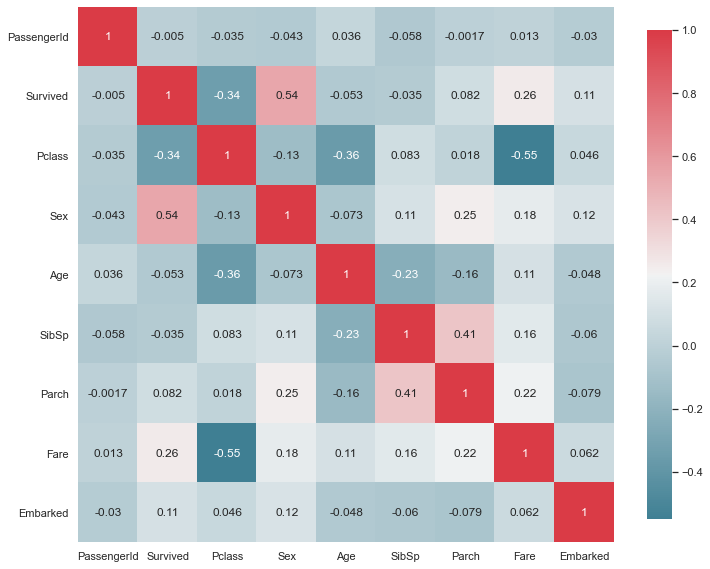

In [76]:
plot_correlation_map(df)

the heat map shows the relative intensity of values captured by assigning each value a color representation.based on the heat map, we can see that the most relevant features that has a positive correlation with survival is sex with a correlation of 0,54

In [77]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [78]:
df1 = df[['Name']].copy()
df1['Title'] =df1['Name'].apply(lambda x: x[x.find(', ') + 2:x.find('.')])
df1

,Name,Title
0,"Collander, Mr. Erik Gustaf",Mr
1,"Moen, Mr. Sigurd Hansen",Mr
2,"Jensen, Mr. Hans Peder",Mr
3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",Mrs
4,"Davidson, Mr. Thornton",Mr
...,...,...
886,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs
887,"Sirayanian, Mr. Orsen",Mr
888,"Cacic, Miss. Marija",Miss
889,"Petroff, Mr. Pastcho (""Pentcho"")",Mr


In [79]:
df = pd.concat([df1['Title'], df], axis=1)
df

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Mr,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,0
1,Mr,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0
2,Mr,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,0
3,Mrs,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,0
4,Mr,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Mrs,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,1
887,Mr,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,1
888,Miss,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,0
889,Mr,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,24.0,0,0,349215,7.8958,G6,0


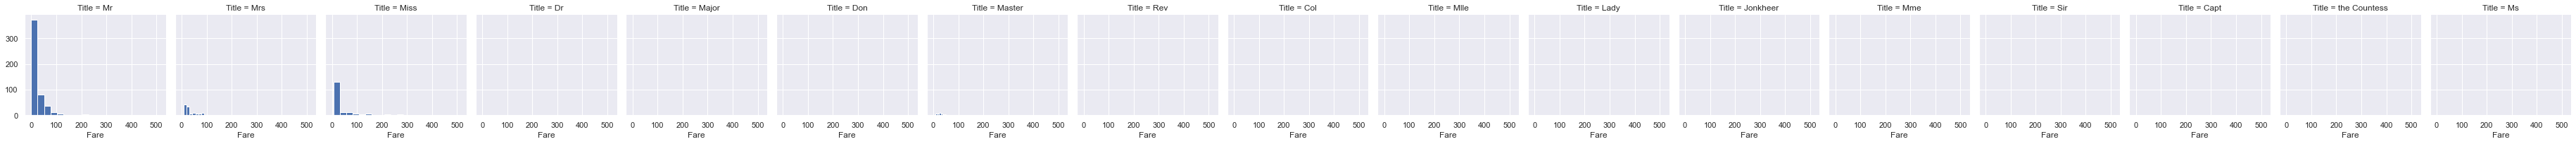

In [80]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Fare',bins=20)

In [81]:
df['Title'].replace(to_replace=['Mlle', 'Ms'], value='Miss', inplace=True)

In [82]:
df['Title'].replace(to_replace='Mme', value='Mrs', inplace=True)

In [83]:
df['Title'].replace(to_replace=['Don', 'Lady', 'Sir', 'the Countess', 'Jonkheer', 'Dona'],
                             value='Royalty', inplace=True)

In [84]:
df['Title'].replace(to_replace=["Capt", "Col", "Major", "Dr",  "Rev"], value='officer', inplace=True)

In [85]:
df

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Mr,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,0
1,Mr,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0
2,Mr,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,0
3,Mrs,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,0
4,Mr,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Mrs,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,1
887,Mr,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,1
888,Miss,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,0
889,Mr,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,24.0,0,0,349215,7.8958,G6,0


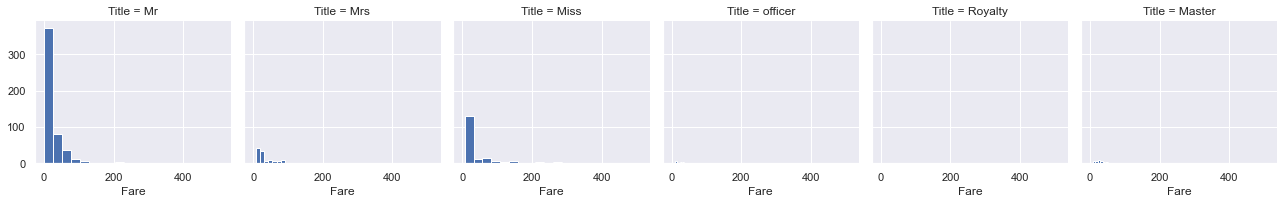

In [86]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Fare',bins=20)

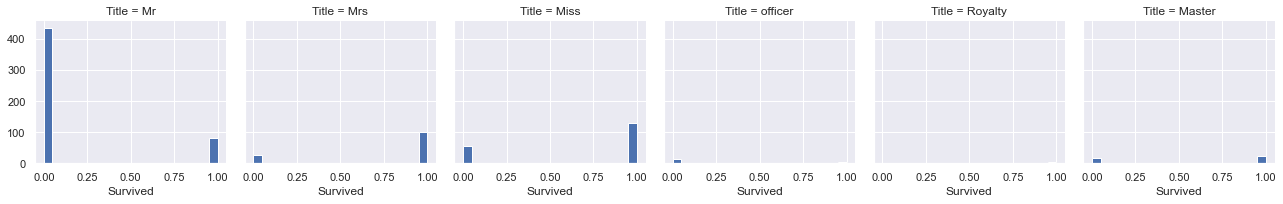

In [87]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Survived',bins=20)

In [88]:
df["period"] = df["Parch"] + df["SibSp"]

In [89]:
df['FamilySize']=df['period']

In [91]:
df.drop(['period'], axis = 1)

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,Mr,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,0,0
1,Mr,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0,0
2,Mr,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,0,0
3,Mrs,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,0,4
4,Mr,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Mrs,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,1,1
887,Mr,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,1,0
888,Miss,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,0,0
889,Mr,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,24.0,0,0,349215,7.8958,G6,0,0


In [92]:
df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
